In [1]:
#このコードはGoogle Colabの環境でTensorFlow2のライブラリーを使用するためのコードです。
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, \
    MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#画像の2次元特徴を活用するため、x_trainとx_testを4次元のテンソルに変換する。
#2番目と3番目の次元で画像のサイズを指定します。
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [0]:
#画像の5×5の部分領域を畳み込んで、32個の特徴量を抽出する畳み込み層Conv2Dを定義します。
#活性化関数をReLU関数とします。
model = Sequential([
    Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'),
    #次に2×2のMaxプーリング層MaxPooling2Dを生成します。
    MaxPooling2D(pool_size=(2,2)),
    #第2の畳み込み層も生成します。今度は、32個の特徴量から64個の特徴量を抽出します。
    #さらにMaxプーリング層で縮小します。
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    #1層のMaxプーリング層で画像サイズは半分になるため、2層のあとでは画像サイズは28の1/4で7、すなわち7×7に縮小されます。これをFlattenで1次元化にします。
    #次に、1024個のニューロンを持つ全結合層Denseを生成し、活性化関数としてReLU関数を適用します。
    Flatten(),
    Dense(1024, activation='relu'),
    #過学習を防ぐため、ドロップアウト層Dropoutを生成します。ドロップアウトとは、一部のニューロンを無視して学習する手法です。
    #ニューロンの出力をドロップアウトさせる確率を0.5とします。
    Dropout(0.5),
    #最後に、10個のクラスに対応する10個のニューロンを持つ出力層を定義します。
    Dense(10, activation='softmax')
])

In [0]:
#損失関数を交差エントロピーとし、最適化関数をadamとして、ネットワークをコンパイルします。
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
#訓練を開始します。
history = model.fit(x_train, y_train, epochs=5, batch_size=75,
                    verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0174 - accuracy: 0.9945
Epoch 2/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0133 - accuracy: 0.9958
Epoch 3/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0120 - accuracy: 0.9957
Epoch 4/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0097 - accuracy: 0.9970
Epoch 5/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0096 - accuracy: 0.9968


In [11]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Accuracy =', score[1])

10000/10000 [==============================] - 1s 85us/sample - loss: 0.0254 - accuracy: 0.9934
Accuracy = 0.9934


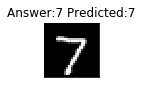

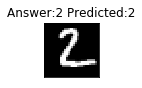

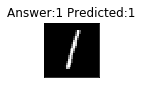

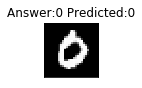

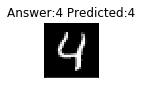

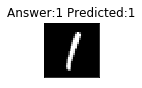

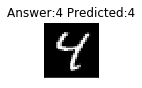

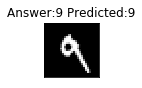

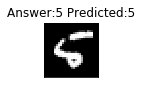

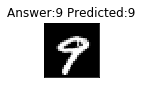

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure(figsize=(1,1))

    score = model.predict(x_test[i].reshape(1, 28, 28, 1))
    predicted = np.argmax(score) 
    answer = np.argmax(y_test[i])
    plt.title('Answer:' + str(answer) + ' Predicted:' + str(predicted))
    
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.show()